<img src="https://cs6.pikabu.ru/images/big_size_comm/2017-08_6/1504088679155420172.png" height="250"> 

# Андан на экономе

## Семинар 1: симуляции в python

На этом семинаре мы поговорим про то, как в python можно симулировать разные случайные величины и решать с помощью симуляций разные задачи. 

## 1. Разминка

В задачах для разминки можно пользоваться как классическим `python`, так и `numpy`. Мы с ним ещё чисто формально не знакомы и только начинаем с ним дружить. Но семинаристы уже могут начать вас к нему приучать.

In [1]:
n_obj = 10**6 

In [2]:
n_obj

1000000

### Задачка 1 (про монетки)

У Олега и Мирона есть монетки. Они их подкидывают и орут "ОРЁЛ - РЕШКА". Монетка Олега выпадает орлом с вероятностью $0.6$. Монетка Мирона с вероятностью $0.4$. Мирон и Олег подкидывают монетки, пока не выпадет орёл.

__а)__ Найдите с помощью симуляций вероятность того, что Олег сделает больше подбрасываний, чем Мирон. 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сккккрааа!

__б)__ Пусть $X$ -- число подкидываний Мирона, а $Y$ -- Олега. Найдите с помощью симуляций $\mathbb{E}(X - Y)$.

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ БРЯ!

### Задачка 2 (про удава)

Удав Анатолий любит французские багеты. Длина французского багета равна 1 метру. За один заглот Удав Анатолий заглатывает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ заглотов.

Найдите с помощью симуляций $\mathbb{E}(N)$ и $\text{Var}(N)$. 

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn
import matplotlib.pyplot as plt

In [6]:
def poedanie(l=1):
    generator = stats.uniform(0, 1)
    ykus = generator.rvs(size=1)
    conut = 0
    while l > 0:
        conut += 1
        l -= ykus
        ykus = generator.rvs(size=1)
    return conut

In [7]:
poedanie()

4

In [8]:
np.array([poedanie() for i in range(1000)]).mean()

np.float64(2.743)

In [9]:
# ?stats.uniform

Эту задачку очень сложно решить в лоб, но вы можете попробоввать. В сборнике сложных задач по терверу, [культурном коде](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf), можно найти три разных решения этой задачки. Она там находится под номером 46.

### Задачка 3 (про шнур)

На шнуре длиной 1 метр случайным образом делают два разреза. С какой вероятностью хотя бы один из получившихся кусков будет длиннее $0.5$м?

In [10]:
gener_uniform = stats.uniform(0, 1)


In [11]:
massive = gener_uniform.rvs(size=2)

In [12]:
gener_uniform.expect()

np.float64(0.5)

In [13]:
massive

array([0.54792372, 0.82228959])

In [14]:
def counter() -> bool:
    new_mass = gener_uniform.rvs(size=2)
    if new_mass.min() >= 0.5 or new_mass.max() <= 0.5:
        return True
    elif (new_mass.max() - new_mass.min()) >= 0.5:
        return True
    # elif new_mass.min() - 0.5 > 0:
        # return True
    return False

In [15]:
counter()

True

In [16]:
np.mean([counter() for _ in range(10000)])

np.float64(0.7431)

## 2. Генерация случайных величин в python



In [17]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Создать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [18]:
norm_rv = stats.norm(0, 1)

In [19]:
norm_rv.ppf(0.5)

np.float64(0.0)

In [20]:
norm_rv.pdf(0.001)

np.float64(0.3989420809303424)

In [21]:
norm_rv.stats()

(np.float64(0.0), np.float64(1.0))

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [22]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:10]

array([-0.76099428,  0.08531245, -0.54224838, -0.40906253,  0.5461887 ,
       -0.08795443, -0.26414722, -0.18878496,  0.33714481,  1.11366589])

## 3. Плотность и функция распределения

Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать значиние плотности __$f(1)$__.

In [23]:
norm_rv.pdf(1)

np.float64(0.24197072451914337)

Можем построить картинку для плотности распределения, $f(x)$. 

In [24]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

Text(1, 0.24197072451914337, 'значение в единице')

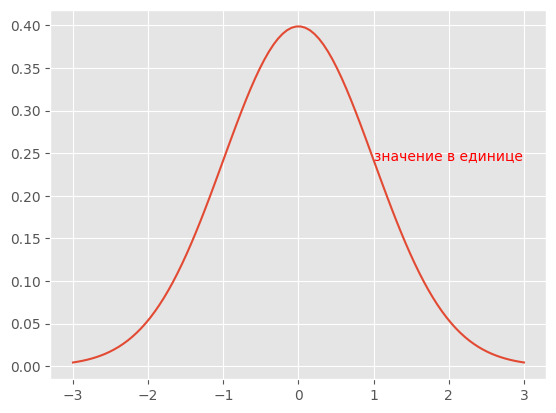

In [25]:
sns.lineplot(x=x, y=pdf)

plt.text(1, y=norm_rv.pdf(1), s='значение в единице', color='red', size=10)

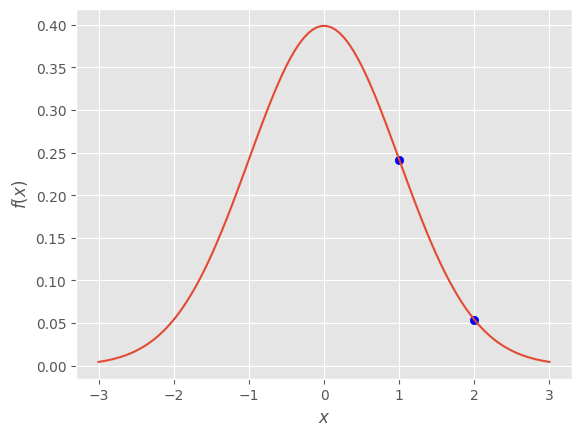

In [26]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [27]:
norm_rv.cdf(1)

np.float64(0.8413447460685429)

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

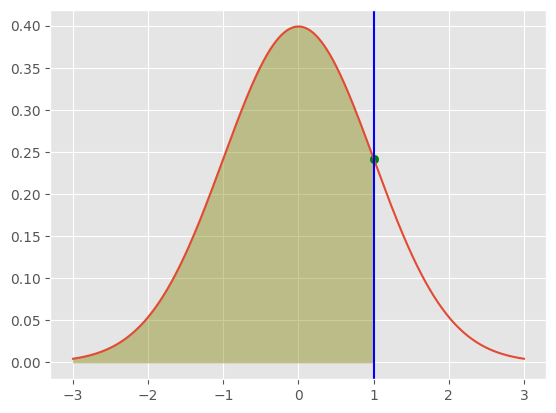

In [28]:
x = np.linspace(-3, 3, 1000)
pdf_value = norm_rv.pdf(x)

plt.plot(x, pdf_value)
plt.axvline(x=1, color='blue')
plt.fill_between(x=np.linspace(-3, 1, 100), y1=0, y2=norm_rv.pdf(np.linspace(-3, 1, 100)), alpha=0.4, color='olive')
plt.scatter(x=1, y=norm_rv.pdf(1), color='green')
plt.show()

Можем построить картинку для функции распределения.

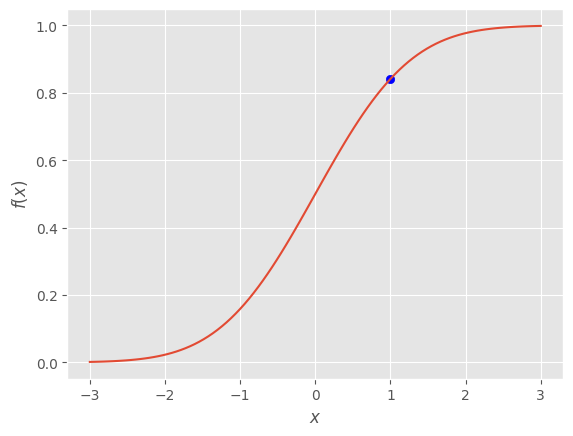

In [29]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [norm_rv.cdf(1)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [30]:
norm_rv.cdf(3) - norm_rv.cdf(1)

np.float64(0.15730535589982697)

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

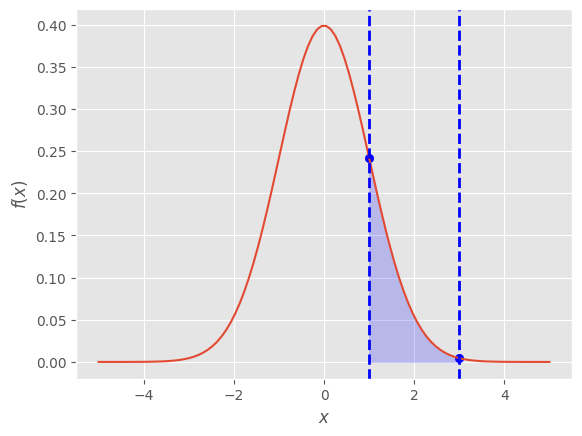

In [31]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $5\%$ и нарисуем его на картинке с плотностью:

In [32]:
q = norm_rv.ppf(0.1)
q = norm_rv.ppf(0.5)  # медиана
q

np.float64(0.0)

Text(0.1, 0.33511151553720353, '0.0')

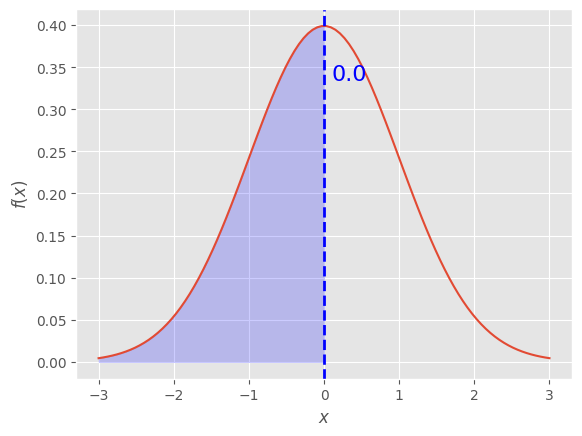

In [33]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16)

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [34]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([ 4.94827161,  4.95075885,  0.193375  ,  1.90280228, 11.79211148])

In [35]:
massive_value = exp_rv.pdf(np.linspace(0, 100, 10000))

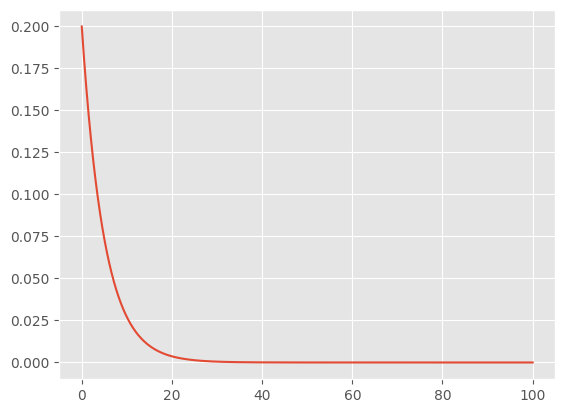

In [36]:
plt.plot(np.linspace(0, 100, 10000), massive_value)

## 4. Эмпирическое распределение 

Давайте теперь поработаем с выборкой. Обычно мы не знаем из какого распределения она пришла к нам в руки. Мы можем посчитать какие-нибудь характеристики для нашей случайной величины.

In [37]:
sample[:10]

array([-0.76099428,  0.08531245, -0.54224838, -0.40906253,  0.5461887 ,
       -0.08795443, -0.26414722, -0.18878496,  0.33714481,  1.11366589])

In [38]:
sample.shape

(1000,)

In [39]:
np.mean(sample)  # выборочное среднее(при больших n похоже на математическое ожидание)

np.float64(0.013022679488116508)

In [40]:
np.var(sample)   # выборочная дисперсия

np.float64(0.9854131942687269)

In [41]:
np.std(sample)   # выборочное стандартное отклонение

np.float64(0.9926798045033085)

In [42]:
np.median(sample) # выборочная медиана

np.float64(-0.032235619701482976)

Построим гистограмму. Гистограмма - это эмпирическая оценка для плотности распределения. 

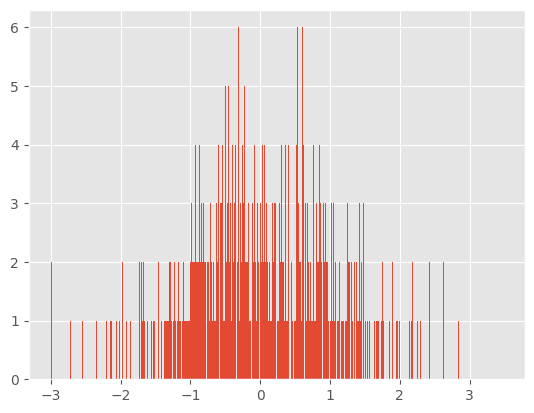

In [43]:
plt.hist(sample, bins=1000);  # bins отвечает за число столбцов

Нарисуем гистограмму и плотность на одной картинке. 

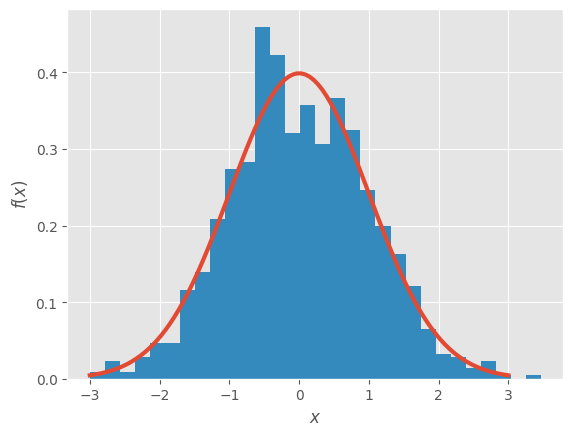

In [44]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

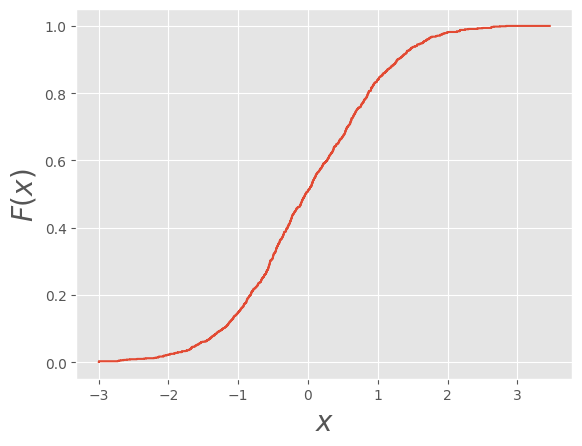

In [45]:
# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Можно нарисовать её на одной картинке с теоретической:

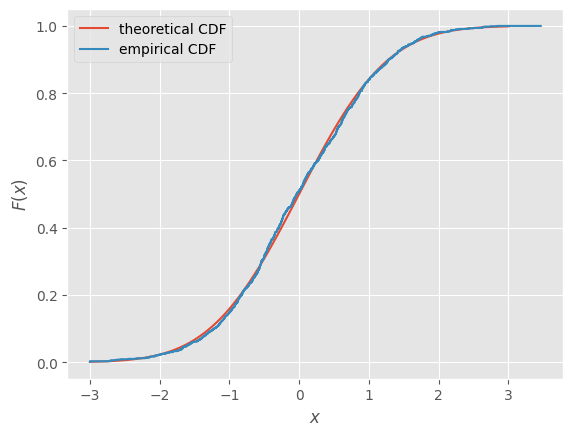

In [46]:
x = np.linspace(-3, 3, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## 5. Генерация выборок

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

Мы это будем делать [с помощью `np.random`.](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) Внутри numpy реализованы самые простые генераторы, и их, обычно, использовать довольно удобно. 

In [47]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [48]:
np.random.choice(np.arange(1, 11), size=7, replace=False)

array([1, 4, 7, 2, 8, 9, 6])

Можно делать генерации с повторениями, параметр `replace` базово равен `True`.

In [49]:
np.random.choice(np.arange(1,11), 
                 size=5,
                replace=True) # с повторениями

array([1, 2, 9, 5, 5])

А ещё можно самостоятельно расставить вероятности событий. Давайте, например устроим симуляцию рыбалки! 

In [50]:
np.random.choice(['карась', 'плотва', 'щука'], 
                 size=10, 
                 p=[0.5, 0.2, 0.3]) # с повторениями

array(['карась', 'карась', 'карась', 'плотва', 'плотва', 'карась',
       'карась', 'щука', 'щука', 'карась'], dtype='<U6')

## 6. Зёрна 

Если выполнить команду `stats.norm(loc=3, scale=2).rvs(5)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :)

In [51]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([4.37958135, 1.28863045, 2.17143457, 1.20018902, 8.32615717])

In [52]:
stats.norm(loc=3, scale=2).rvs(5)

array([4.73831515, 2.33153945, 5.39110933, 2.27805748, 1.74480025])

Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [53]:
stats.norm(loc=3, scale=2).rvs(5, random_state=42)

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])

__Угадайте, какие числа чаще всего используют для зёрен?__

Многие алгоритмы в анализе данных в какой-то степени основаны на случайности (например в самом начале обучения веса берутся из какого-то распределения или обучение идёт на случайной подвыборке). Чтобы добиться воспроизводимых, одинаковых результатов, не зависящих от запуска, нужно устанавливать зерно генерации. 

## 7. Ещё больше задачек!

### Задачка 4 (про спам)

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам.

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем? 

In [54]:
posi_rv = stats.poisson(3)
# ?stats.poisson

In [55]:
(1-posi_rv.cdf(4)) * 100

np.float64(18.473675547622783)

### Задачка 5 (очень важная задача, где ничего не работает)

К сожалению, возможности симуляций сильно ограничены. Всё может сломаться. 

__а)__ Пусть $X \sim N(0,3)$. Попробуйте с помощью симуляций оценить $\mathbb{E}\left(\frac{1}{X^2 + 1} \right)$. Много раз запустите код. Стабильно ли ведёт себя оценка?

In [56]:
norm_rv = stats.norm(0, np.sqrt(3))

In [57]:
[np.mean([1/(norm_rv.rvs()**2+ 1) for _ in range(10000)]) for _ in range(5)]

[np.float64(0.4823511695571504),
 np.float64(0.48110785294100433),
 np.float64(0.4852091064284681),
 np.float64(0.48307696864557204),
 np.float64(0.47992037067532456)]

In [58]:
# ?stats.norm

__б)__ Сделайте то же самое с $\mathbb{E}\left(\frac{1}{X} \right)$. Стабильно ли ведёт себя оценка? Объясните, почему так происходит.

In [59]:
for _ in range(7):
    print(np.mean([1/(norm_rv.rvs()) for _ in range(10000)]))

0.48220969550861936
4.246216443297657
0.6227692136564484
3.3490400765910047
-0.3599889763899395
1.0099747796318643
-0.12230906290767635


### Задачка 6 (человек и параход)

Иван Фёдорович Крузенштерн (ШТО?!) случайным образом с возможностью повторов выбирает $10$ натуральных чисел от $1$ до $100$. Пусть $X$ — минимум из этих чисел, а $Y$ — максимум.

С помощью симуляций оцените все величины ниже. Пользуйтесь векторными вычислениями в numpy!

__а)__ $\mathbb{P}(Y > 3X)$

In [60]:
n_obs = 10 ** 6
X = np.random.choice(np.arange(1, 100), replace=True, size=(n_obs, 10))

y = X.max(axis=1)
x = X.min(axis=1)
y

array([94, 97, 97, ..., 91, 96, 88], shape=(1000000,))

In [62]:
np.mean(y > 3*x)

np.float64(0.971781)

__б)__ $\mathbb{E}(X \cdot Y)$

In [303]:
np.mean(y * x)

np.float64(866.808359)

__в)__ $\mathbb{P}(Y > 3X \mid Y < X^2)$

In [65]:
mask = y < x**2

In [70]:
np.mean(y[mask] > 3 * x[mask]) * 100

np.float64(92.79084798675635)

__г)__ $\mathbb{E}(X \cdot Y \mid Y < X^2)$

In [71]:
np.mean(y[mask] * x[mask])

np.float64(1605.7639672689834)

__д)__ $\mathbb{E}\left(\frac{X}{X + Y} \right)$

In [72]:
np.mean(x / (x+ y))

np.float64(0.08964594863256865)

__е)__ $\text{Corr}(X,Y)$

In [81]:
cov_x_y = np.mean((x - np.mean(x)) * (y-np.mean(y)))

In [82]:
corr = cov_x_y / (x.std() * y.std())

In [83]:
corr

np.float64(0.10063088746036285)

In [84]:
np.corrcoef(x, y)

array([[1.        , 0.10063089],
       [0.10063089, 1.        ]])

__ё)__ Быква ё важна! Это вам скажет Лёв Толстой и Пафнутий Чебышёв!

Нарисуйте облако рассеивания для выборки из $100$ наблюдений $x,y$

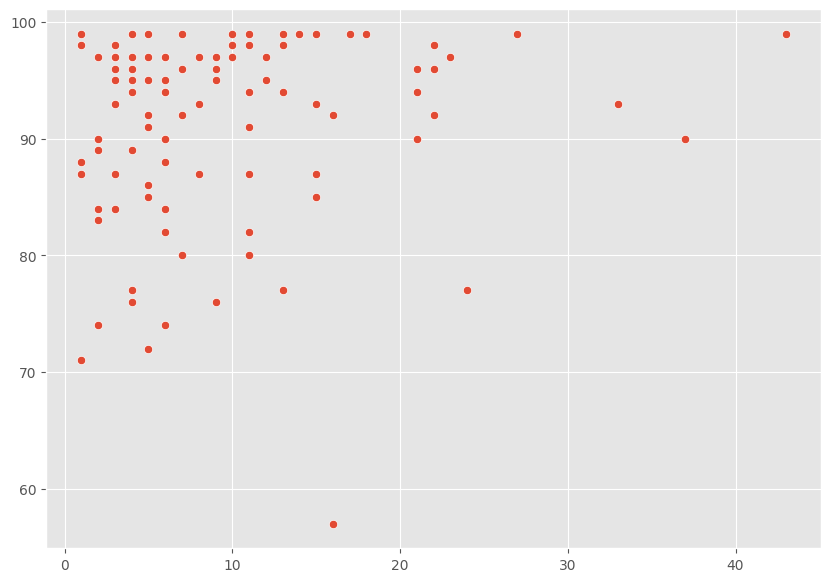

In [86]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=x[:100], y=y[:100])

plt.show()

__ж)__ Нарисуйте гистограмму для случайной величины $X$, отметьте на гистограмме пунктирными линиями разных цветов её медиану и среднее.

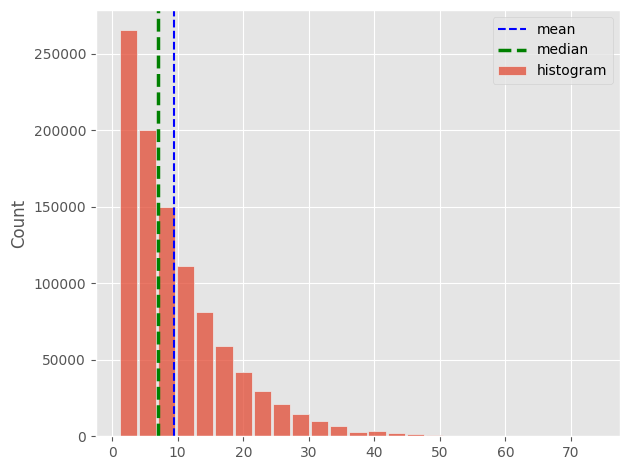

In [101]:
sns.histplot(x=x, bins=25, shrink=0.9, label='histogram')
plt.axvline(x=x.mean(), color='blue', linestyle='--', label='mean')
plt.axvline(x=np.median(x), color='green', linestyle='--', linewidth=2.5, label='median')


plt.legend()
plt.tight_layout()
plt.show()

[BIG SHAQ - MANS NOT HOT (MUSIC VIDEO)](https://www.youtube.com/watch?v=eE4qxB2E8d4)

Эдлибов много не бывает